In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import folium
import requests
from pandas.io.json import json_normalize

## Business Problem

The India business landscape is prepared to grow in multiple areas due to several factors such as international trade, government stimulus, and an overall strong developing country. With a young population that is rising to leadership and technology driving growth and innovation, there are several business opportunities in multiple sectors that we are going to explore today.

Many small business start-ups, in order to reduce expenditure usually settle for a cheap location. Others believe that location doesn’t matter provided the product is right. However, getting a good location is very critical to the success of your business but this can prove quite difficult because one of the challenges of starting a business successfully is getting a good business site.

Now India is a large country, with a population of more than 1.3 billion people. It will become impossible to simply zero in on perfect location by starting randomly choosing a place or city. So, it’s better to first identify most viable target locations and then probably decide among them based on various virtues and features. For this reason alone, I restricted my analysis to 5 major cities of India, which in a way are Economic, Technological and demographic centres of India. They are,

* Delhi
* Mumbai
* Chennai
* Kolkata
* Bengaluru

Now, we need to just compare these cities and identify the best of them based on some common parameters. These parameters will eventually help us to select the best features to recommend best location.

* Optimal distance between city centre and the proposed location.
* Selection of cuisine.
* Density of local businesses at the proposed location.
* Traffic Conditions (also instrumental in case of online deliveries)

This analysis would be really helpful for the small businesses and start-ups who are looking to locate their stores/ restaurants at optimal location to get a jump start.

## Data Sources

Now there are many location services which provide various details about and around a particular location in a city. However, Foursquare is one of the freely available services which return a list of the recommended venues around a location based on various factors which include distance, type of business and likes or dislikes.

An easy way to get this data is through Foursquare Places API’s explore endpoint. The documentation on how to create foursquare developer account, rate limits and calling methods is available on the link [here](https://developer.foursquare.com/docs/places-api)

Another data source that we will be using in this project will be Traffic API provided by Bing Maps. This API can be used to get traffic information on a particular set of location. A complete detailed documentation on this REST API is available [here](https://docs.microsoft.com/en-us/bingmaps/rest-services/traffic/) 


In [1]:
#Initialising parameters for foursquare API
CLIENT_ID = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX' # your Foursquare ID
CLIENT_SECRET = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX' # your Foursquare Secret
VERSION = '20200101'
LIMIT = 200
radius = 10000
#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

In [3]:
# Initialising the lat and longs for all cities
latitude = [28.644800, 19.076090, 13.067439, 22.572645, 12.972442] #delhi, Mumbai Chennai kolkata bangalore
longitude = [77.216721, 72.877426, 80.237617, 88.363892, 77.580643]

In [4]:
# List comprehenssion for getting urls.
urls = ['https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, long, VERSION, radius, LIMIT) for lat, long in zip(latitude, longitude)]
urls

['https://api.foursquare.com/v2/venues/explore?client_id=XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX&client_secret=XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX&ll=28.6448,77.216721&v=20200101&radius=10000&limit=200',
 'https://api.foursquare.com/v2/venues/explore?client_id=XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX&client_secret=XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX&ll=19.07609,72.877426&v=20200101&radius=10000&limit=200',
 'https://api.foursquare.com/v2/venues/explore?client_id=XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX&client_secret=XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX&ll=13.067439,80.237617&v=20200101&radius=10000&limit=200',
 'https://api.foursquare.com/v2/venues/explore?client_id=XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX&client_secret=XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX&ll=22.572645,88.363892&v=20200101&radius=10000&limit=200',
 'https://api.foursquare.com/v2/venues/explore?client_id=XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX&clie

In [5]:
#fetching data for each city

result = [requests.get(url).json() for url in urls]

In [6]:
delhi_result = result[0]['response']['groups'][0]['items']
mumbai_result = result[1]['response']['groups'][0]['items']
chennai_result = result[2]['response']['groups'][0]['items']
kolkata_result = result[3]['response']['groups'][0]['items']
beng_result = result[4]['response']['groups'][0]['items']

In [7]:
# obtaining json for each city
df_delhi = json_normalize(delhi_result)
df_mumbai = json_normalize(mumbai_result)
df_chennai = json_normalize(chennai_result)
df_kolkata = json_normalize(kolkata_result)
df_beng = json_normalize(beng_result)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWar

### Data Wrangling and Cleaning

In [8]:
# getting categories through functions
def venue_category(df):
    lst = df['venue.categories']
    if len(lst) == 0:
        return None
    else:
        return lst[0]['name']

df_delhi['category'] = df_delhi.apply(venue_category, axis = 1)
df_mumbai['category'] = df_mumbai.apply(venue_category, axis = 1)
df_chennai['category'] = df_chennai.apply(venue_category, axis = 1)
df_kolkata['category'] = df_kolkata.apply(venue_category, axis = 1)
df_beng['category'] = df_beng.apply(venue_category, axis = 1)

In [9]:
# Cleaning the dataframes
dfs = [df_delhi, df_mumbai, df_chennai, df_kolkata, df_beng]

for df in dfs:
    df.drop(['venue.photos.count', 'venue.photos.groups', 'venue.venuePage.id', 
                'venue.location.neighborhood', 'referralId', 'reasons.count', 'reasons.items', 
                'venue.location.cc', 'venue.location.postalCode', 'venue.location.labeledLatLngs'], axis = 1, inplace = True )


In [10]:
for df in dfs:
    df.rename(columns = lambda col : col.split('.')[-1], inplace = True)

In [11]:
# final columns available in the dataframes
df_delhi.columns

Index(['id', 'name', 'address', 'crossStreet', 'lat', 'lng', 'distance',
       'city', 'state', 'country', 'formattedAddress', 'categories',
       'category'],
      dtype='object')

## Exploratory Data Analysis

Although it seems quite intuitive that in a particular country the most restaurants will serve the local cuisine only. However, the relationship between the cuisine and the restaurant where it is served and where it is located might not have been explored earlier. During this project, when trying to probe this relation, I found out that it may not always be the case. 
To understand better, I binned, then one hot coded the distances from the city centre and tried to find the distribution of top 3 categories in all the distance zones. 

### 1. Delhi EDA

In [12]:
# One hot encoding
df_del_cat = pd.get_dummies(df_delhi['category'])
df_del_cat

,Arcade,Art Gallery,Art Museum,BBQ Joint,Bakery,Bar,Bistro,Boutique,Café,Chinese Restaurant,...,Restaurant,Sandwich Place,Sculpture Garden,Smoke Shop,Snack Place,South Indian Restaurant,Spa,Spiritual Center,Theater,Tibetan Restaurant
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# distribution of categories among venues
df_del_cat.mean()

Arcade                             0.01
Art Gallery                        0.02
Art Museum                         0.01
BBQ Joint                          0.03
Bakery                             0.01
Bar                                0.03
Bistro                             0.01
Boutique                           0.01
Café                               0.10
Chinese Restaurant                 0.01
Clothing Store                     0.01
Cocktail Bar                       0.01
Coffee Shop                        0.02
Deli / Bodega                      0.02
Dessert Shop                       0.01
Donut Shop                         0.01
Fast Food Restaurant               0.02
Food & Drink Shop                  0.01
Food Truck                         0.01
French Restaurant                  0.01
Golf Course                        0.01
Hindu Temple                       0.01
Historic Site                      0.01
Hotel                              0.10
Ice Cream Shop                     0.01


In [14]:
df_del_con = pd.concat([df_delhi, df_del_cat], axis = 1)

In [15]:
# binning the distances for EDA
bins = [0, 2000, 4000, 6000, 8000, 10000]
group_name = ['very near', 'near', 'far', 'very far', 'outlier']
df_del_con['distance_binned'] = pd.cut(df_del_con['distance'], bins, labels=group_name, include_lowest=True )

In [16]:
# spatial distribution of venues 
df_del_con = pd.concat([df_delhi, df_del_cat], axis = 1)
df_del_con['distance_binned'] = pd.cut(df_del_con['distance'], bins, labels=group_name, include_lowest=True )
df_del_bin = pd.get_dummies(df_del_con['distance_binned'])
df_del_bin.mean()

very near    0.29
near         0.21
far          0.32
very far     0.17
outlier      0.01
dtype: float64

In [17]:
df_final_del = pd.concat([df_del_con, pd.DataFrame(df_del_bin)], axis = 1)
df_final_del.head()

,id,name,address,crossStreet,lat,lng,distance,city,state,country,...,Spa,Spiritual Center,Theater,Tibetan Restaurant,distance_binned,very near,near,far,very far,outlier
0,54783eab498e910f8bd1781d,Naturals Ice Cream,L Block Outer Circle,Connaught Place,28.634455,77.222139,1267,New Delhi,Delhi,India,...,0,0,0,0,very near,1,0,0,0,0
1,4bc8f2c7762beee1a8bb3d38,The Imperial,Janpath,NaN,28.625548,77.218664,2151,New Delhi,Delhi,India,...,0,0,0,0,near,0,1,0,0,0
2,4b489b54f964a520595026e3,Connaught Place | कनॉट प्लेस (Connaught Place),Connaught Place,Many streets meet here,28.632731,77.220018,1381,New Delhi,Delhi,India,...,0,0,0,0,very near,1,0,0,0,0
3,54dc85c7498ef8f9ab9b3c08,Tamra,"19, Ashoka Rd",Windsor Pl,28.620543,77.218174,2703,New Delhi,Delhi,India,...,0,0,0,0,near,0,1,0,0,0
4,518ddbdf498eab246c509547,bloomrooms @ New Delhi Railway Station,"8591, Arakashan Road",opp. new delhi railway station,28.645537,77.217701,126,New Delhi,Delhi,India,...,0,0,0,0,very near,1,0,0,0,0


In [18]:
# Selecting the top three categories distributed across the distances
df_plot_del = df_final_del[['category', 'very near', 'near', 'far', 'very far']].groupby('category').sum()
df_plot_del['Total'] = df_plot_del.sum(axis = 1)
df_final_plot_del = df_plot_del.sort_values(by = 'Total', ascending = False).iloc[0:3,]

### 2. Mumbai EDA

In [19]:
# One hot encoding
df_mum_cat = pd.get_dummies(df_mumbai['category'])
df_mum_cat

,Afghan Restaurant,Asian Restaurant,Bakery,Bar,Beach,Café,Chinese Restaurant,Club House,Cocktail Bar,Coffee Shop,...,Sculpture Garden,Seafood Restaurant,Shopping Mall,Snack Place,Spa,Tea Room,Theater,Theme Park,Toy / Game Store,Vegetarian / Vegan Restaurant
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
97,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# spatial distribution of venues 
df_mum_con = pd.concat([df_mumbai, df_mum_cat], axis = 1)
df_mum_con['distance_binned'] = pd.cut(df_mum_con['distance'], bins, labels=group_name, include_lowest=True )
df_mum_bin = pd.get_dummies(df_mum_con['distance_binned'])
df_mum_bin.mean()

very near    0.05
near         0.24
far          0.55
very far     0.16
outlier      0.00
dtype: float64

In [21]:
df_final_mum = pd.concat([df_mum_con, df_mum_bin], axis = 1)
df_final_mum.head()

,id,name,address,crossStreet,lat,lng,distance,city,state,country,...,Theater,Theme Park,Toy / Game Store,Vegetarian / Vegan Restaurant,distance_binned,very near,near,far,very far,outlier
0,4d9b39ed2ae860fc0f5a81cb,Sofitel Mumbai BKC,"C 57 Bandra Kurla Complex, Bandra East, Mahara...",Bandra East,19.067448,72.869006,1307,Mumbai,Mahārāshtra,India,...,0,0,0,0,very near,1,0,0,0,0
1,5a21b1cea4236243c9628ad2,Hitchki,FIFC,"Bandra Kurla Complex, BKC",19.069730,72.869761,1073,Mumbai,Mahārāshtra,India,...,0,0,0,0,very near,1,0,0,0,0
2,51d2a531454ad6055f94cdce,Hamleys,Phoenix Market City Kurla,"LBS Marg,Near Kamani Junction, Kurla West",19.086655,72.889783,1753,Mumbai,Mahārāshtra,India,...,0,0,1,0,very near,1,0,0,0,0
3,546f25c5498e2d4d056ad6eb,Starbucks Coffee Capital,The Capital,NaN,19.063457,72.861576,2181,NaN,NaN,India,...,0,0,0,0,near,0,1,0,0,0
4,4ccc2f76566aa0931aa61ffd,Natural's Ice Cream,#3 Gokul Harmony,"Kalina Market, Santacruz",19.077560,72.863035,1522,Mumbai,Mahārāshtra,India,...,0,0,0,0,very near,1,0,0,0,0


In [22]:
# Selecting the top three categories distributed across the distances
df_plot_mum = df_final_mum[['category', 'very near', 'near', 'far', 'very far']].groupby('category').sum()
df_plot_mum['Total'] = df_plot_mum.sum(axis = 1)
df_final_plot_mum = df_plot_mum.sort_values(by = 'Total', ascending = False).iloc[0:3,]

### 3. Chennai EDA

In [23]:
# One hot encoding
df_che_cat = pd.get_dummies(df_chennai['category'])
df_che_cat

,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bar,Beach,Burger Joint,Café,Chinese Restaurant,Chocolate Shop,...,Park,Restaurant,Sandwich Place,Shoe Store,Shopping Mall,Snack Place,South Indian Restaurant,Spa,Theater,Vegetarian / Vegan Restaurant
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [24]:
# spatial distribution of venues 
df_che_con = pd.concat([df_chennai, df_che_cat], axis = 1)
df_che_con['distance_binned'] = pd.cut(df_che_con['distance'], bins, labels=group_name, include_lowest=True )
df_che_bin = pd.get_dummies(df_che_con['distance_binned'])
df_che_bin.mean()

very near    0.12
near         0.56
far          0.21
very far     0.08
outlier      0.03
dtype: float64

In [25]:
df_final_che = pd.concat([df_che_con, df_che_bin], axis = 1)
df_final_che.head()

,id,name,address,lat,lng,distance,city,state,country,formattedAddress,...,South Indian Restaurant,Spa,Theater,Vegetarian / Vegan Restaurant,distance_binned,very near,near,far,very far,outlier
0,4c6699a3e1da1b8d5e4d9bc3,Shree Mithai,T.V Rd,13.072118,80.247865,1227,Chennai,Tamil Nadu,India,"[T.V Rd, Chennai, Tamil Nadu, India]",...,0,0,0,0,very near,1,0,0,0,0
1,4c4aa77a9e6dbe9afa01e10a,Alliance Francaise,College Rd,13.066754,80.245659,875,Chennai,Tamil Nadu,India,"[College Rd, Chennai, Tamil Nadu, India]",...,0,0,1,0,very near,1,0,0,0,0
2,4d0c84d41f6bf04d7def7731,gabbana.life,"No 20b, Khader Nawaz Khan Road",13.060753,80.250768,1608,Chennai,Tamil Nadu,India,"[No 20b, Khader Nawaz Khan Road, Chennai 60000...",...,0,0,0,0,very near,1,0,0,0,0
3,4e157190fa764fb14ae73226,Sandy's Chocolate Laboratory,"#16, Wallace Garden 2nd St",13.061070,80.248368,1364,Chennai,Tamil Nadu,India,"[#16, Wallace Garden 2nd St (Nungambakkam), Ch...",...,0,0,0,0,very near,1,0,0,0,0
4,5001224ae4b00846b6f071bc,Bismi Biryani,NaN,13.061664,80.243130,877,Chennai,Tamil Nadu,India,"[Valluvar Kottam High Road, Chennai, Tamil Nad...",...,0,0,0,0,very near,1,0,0,0,0


In [26]:
# Selecting the top three categories distributed across the distances
df_plot_che = df_final_che[['category', 'very near', 'near', 'far', 'very far']].groupby('category').sum()
df_plot_che['Total'] = df_plot_che.sum(axis = 1)
df_final_plot_che = df_plot_che.sort_values(by = 'Total', ascending = False).iloc[0:3,]

### 4. Kolkata EDA

In [27]:
# One hot encoding
df_kol_cat = pd.get_dummies(df_kolkata['category'])
df_kol_cat

,American Restaurant,Arts & Crafts Store,Asian Restaurant,Awadhi Restaurant,BBQ Joint,Bakery,Bar,Bengali Restaurant,Bookstore,Botanical Garden,...,Pizza Place,Pool,Pub,Restaurant,Sandwich Place,Shopping Mall,Soccer Stadium,Sports Club,Tea Room,Tibetan Restaurant
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# spatial distribution of venues 
df_kol_con = pd.concat([df_kolkata, df_kol_cat], axis = 1)
df_kol_con['distance_binned'] = pd.cut(df_kol_con['distance'], bins, labels=group_name, include_lowest=True )
df_kol_bin = pd.get_dummies(df_kol_con['distance_binned'])
df_kol_bin.mean()

very near    0.05
near         0.31
far          0.39
very far     0.22
outlier      0.03
dtype: float64

In [29]:
df_final_kol = pd.concat([df_kol_con, df_kol_bin], axis = 1)
df_final_kol.head()

,id,name,address,lat,lng,distance,city,state,country,formattedAddress,...,Soccer Stadium,Sports Club,Tea Room,Tibetan Restaurant,distance_binned,very near,near,far,very far,outlier
0,4d4c107ee1ec6dcbad95d475,The Oberoi Grand,"15, Jawaharlal Nehru Rd",22.561749,88.351594,1751,Kolkata,West Bengal,India,"[15, Jawaharlal Nehru Rd, Kolkata 700013, West...",...,0,0,0,0,very near,1,0,0,0,0
1,4e2c0d7a18a80bb0585fae4d,Blue & Beyond,Hotel Lindsay,22.559131,88.353280,1858,Kolkata,West Bengal,India,"[Hotel Lindsay, Kolkata 700087, West Bengal, I...",...,0,0,0,0,very near,1,0,0,0,0
2,4bc9c62b511f9521982faec7,Eden Garden,BBD Bagh,22.564542,88.343296,2301,Kolkata,West Bengal,India,"[BBD Bagh, Kolkata 700021, West Bengal, India]",...,0,0,0,0,near,0,1,0,0,0
3,4bd1a0bd5e0cce72d3bda184,Lalit Great Eastern Hotel,Hemanta Basu Sarani,22.567967,88.350010,1519,Kolkata,West Bengal,India,"[Hemanta Basu Sarani, Kolkata 700001, West Ben...",...,0,0,0,0,very near,1,0,0,0,0
4,5239ee910493e46a092f23c7,Arsalan,"119A, Muzaffar Ahmed St",22.553897,88.354063,2318,Kolkata,West Bengal,India,"[119A, Muzaffar Ahmed St (Park St), Kolkata 70...",...,0,0,0,0,near,0,1,0,0,0


In [30]:
# Selecting the top three categories distributed across the distances
df_plot_kol = df_final_kol[['category', 'very near', 'near', 'far', 'very far']].groupby('category').sum()
df_plot_kol['Total'] = df_plot_kol.sum(axis = 1)
df_final_plot_kol = df_plot_kol.sort_values(by = 'Total', ascending = False).iloc[0:3,]

### 5. Bangalore EDA

In [31]:
# One hot encoding
df_ben_cat = pd.get_dummies(df_beng['category'])
df_ben_cat

,Afghan Restaurant,American Restaurant,Asian Restaurant,Bakery,Bar,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,...,Sandwich Place,Shopping Mall,Snack Place,Spa,Steakhouse,Sushi Restaurant,Tea Room,Theater,Toy / Game Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# spatial distribution of venues 
df_ben_con = pd.concat([df_beng, df_ben_cat], axis = 1)
df_ben_con['distance_binned'] = pd.cut(df_ben_con['distance'], bins, labels=group_name, include_lowest=True )
df_ben_bin = pd.get_dummies(df_ben_con['distance_binned'])
df_ben_bin.mean()

very near    0.14
near         0.33
far          0.38
very far     0.15
outlier      0.00
dtype: float64

In [33]:
df_final_ben = pd.concat([df_ben_con, df_ben_bin], axis = 1)
df_final_ben.head()

,id,name,address,lat,lng,distance,city,state,country,formattedAddress,...,Tea Room,Theater,Toy / Game Store,Yoga Studio,distance_binned,very near,near,far,very far,outlier
0,51d1245e498ef93fd0e713bb,JW Marriott Hotel Bengaluru,24/1 Vittal Mallya Road,12.972362,77.595051,1563,Bangalore,Karnātaka,India,"[24/1 Vittal Mallya Road, Bangalore 560001, Ka...",...,0,0,0,0,very near,1,0,0,0,0
1,4b69572ff964a520509f2be3,Taj West End,Racecourse Rd.,12.984572,77.584893,1426,Bangalore,Karnātaka,India,"[Racecourse Rd., Bangalore, Karnātaka, India]",...,0,0,0,0,very near,1,0,0,0,0
2,4bcd805cfb84c9b61512223e,UB City,at Vittal Mallya Rd,12.971709,77.595905,1657,Bangalore,Karnātaka,India,"[at Vittal Mallya Rd, Bangalore 560001, Karnāt...",...,0,0,0,0,very near,1,0,0,0,0
3,4bc1cd90b492d13a4e74a660,Toscano,UB City Level 2 Concorde Block,12.971980,77.596066,1673,Bangalore,Karnātaka,India,[UB City Level 2 Concorde Block (24 Vittal Mal...,...,0,0,0,0,very near,1,0,0,0,0
4,4bf61de3d4cdb713d04984fe,Brahmins Coffee Bar,Near Shankar Math,12.953983,77.568862,2419,Bangalore,Karnātaka,India,"[Near Shankar Math (Ranga Rao Rd, Shankarpuram...",...,0,0,0,0,near,0,1,0,0,0


In [34]:
# Selecting the top three categories distributed across the distances
df_plot_ben = df_final_ben[['category', 'very near', 'near', 'far', 'very far']].groupby('category').sum()
df_plot_ben['Total'] = df_plot_ben.sum(axis = 1)
df_final_plot_ben = df_plot_ben.sort_values(by = 'Total', ascending = False).iloc[0:3,]

Once again, it is always assumed that most recommended and visited venues are usually nearer to the city square or centre. However, this may be case if all cities are planned, but in real life most cities especially in India are not planned. When trying to establish this distribution, I identified that in almost all cities most of the venues were located either in 2 to 4 KM radius (near) or 4 to 6KM radius (far) region. Now this is an interesting finding and may result because of various factors which could be traffic, lack of commercial space or any other local issue.

## Data Visualization

(array([-0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,
         2.  ,  2.25]),
 <a list of 11 Text xticklabel objects>)

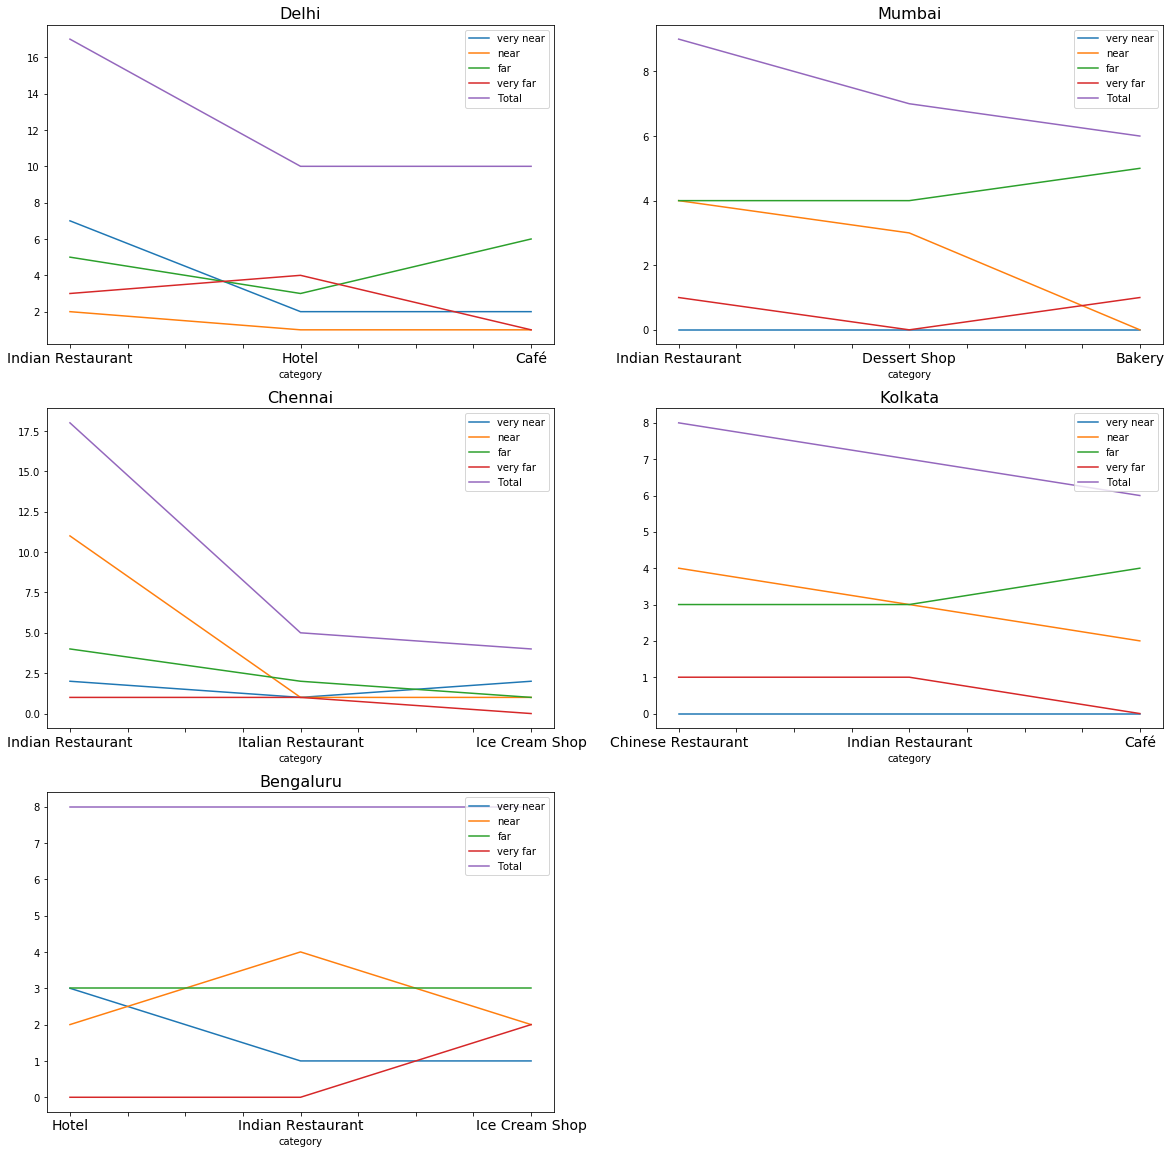

In [35]:
# Let us plot the categories against the binned distances for all cities
plt.figure(figsize = (20,20))

df_final_plot_del.plot(kind = 'line', ax = plt.subplot(3,2,1))
plt.title("Delhi", fontsize = 16)
plt.xticks(fontsize = 14)

df_final_plot_mum.plot(kind = 'line', ax = plt.subplot(3,2,2))
plt.title("Mumbai", fontsize = 16)
plt.xticks(fontsize = 14)

df_final_plot_che.plot(kind = 'line', ax = plt.subplot(3,2,3))
plt.title("Chennai", fontsize = 16)
plt.xticks(fontsize = 14)

df_final_plot_kol.plot(kind = 'line', ax = plt.subplot(3,2,4))
plt.title("Kolkata", fontsize = 16)
plt.xticks(fontsize = 14)

df_final_plot_ben.plot(kind = 'line', ax = plt.subplot(3,2,5))
plt.title("Bengaluru", fontsize = 16)
plt.xticks(fontsize = 14)

## Data Modeling & Evaluation

We have seen during EDA, that not all feature labels including category, distance as well as density represent a true picture of the data available. And, even if end up using anyone of them we will be making huge assumption based on limited amount of spatial data. Hence, the best option here will be to cluster the venues based on their spatial distance with respect to each other and then probably build a recommender system to recommend best cluster based on distance and density of each cluster

KMeans and DBScan are most popular clustering algorithms when it comes to clustering and the another one is hierarchal clustering. Density clustering (for example DBSCAN) seems to correspond more to human intuitions of clustering, rather than distance from a central clustering point (for example KMeans). Usually in case of large geospatial data, DBScan is the most trusted algorithm however, for the purpose of our project where the spatial data is limited between only few kilometres we can consider using KMeans algorithm which considers Euclidean distance between the points by default.

### Choosing Best k for clustering

The k can be determined using two methods,
1. Elbow Method: This is probably the most well-known method for determining the optimal number of clusters. It is also a bit naive in its approach. Calculate the Within-Cluster-Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS becomes first starts to diminish. In the plot of WSS-versus-k, this is visible as an elbow.
2. Silhouette Method: The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation). The range of the Silhouette value is between +1 and -1. A high value is desirable and indicates that the point is placed in the correct cluster. If many points have a negative Silhouette value, it may indicate that we have created too many or too few clusters. The Silhouette Score reaches its global maximum at the optimal k. This should ideally appear as a peak in the Silhouette Value-versus-k plot.

I used elbow method to first determine the best k for each city and tried validating those with Silhouette Coefficient for each k. Pl. note I used StandardScaler() method from Sklearn library to first scale the data. Also, to avoid issues with selection of initial centroid, I initiated init = "k-means++". k-means++ selects initial cluster centres for k-mean clustering in a smart way to speed up convergence.

In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [37]:
# Selecting the features for modelling and scaling 
X_del = df_final_del[['lat', 'lng']]
X_del.head()

,lat,lng
0,28.634455,77.222139
1,28.625548,77.218664
2,28.632731,77.220018
3,28.620543,77.218174
4,28.645537,77.217701


In [38]:
X_del_scaled = StandardScaler().fit_transform(X_del)

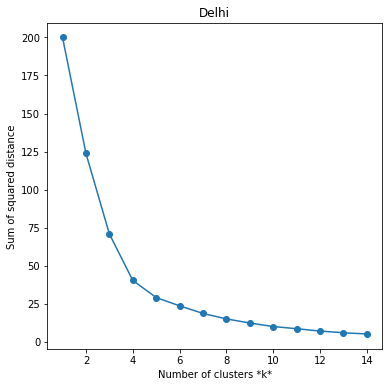

In [39]:
# Creating graph for Elbow Method
sse = []
list_k = list(range(1, 15))

for k in list_k:
    km = KMeans(init = "k-means++", n_clusters=k)
    km.fit(X_del_scaled)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.title('Delhi')
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

Text(0, 0.5, 'Silhouette_score')

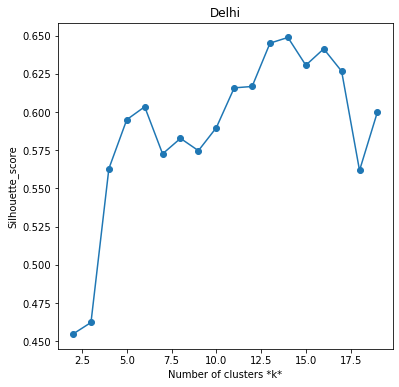

In [40]:
#Creating graph for Silhouette coefficient
ss_score = []

list_k = list(range(2, 20))

for k in list_k:
    km = KMeans(init = "k-means++", n_clusters=k)
    preds = km.fit_predict(X_del_scaled)
    centers = km.cluster_centers_
    score = silhouette_score(X_del_scaled, preds)
    ss_score.append(score)
    
plt.figure(figsize=(6, 6))
plt.title('Delhi')
plt.plot(list_k, ss_score, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Silhouette_score')

Text(0, 0.5, 'Sum of squared distance')

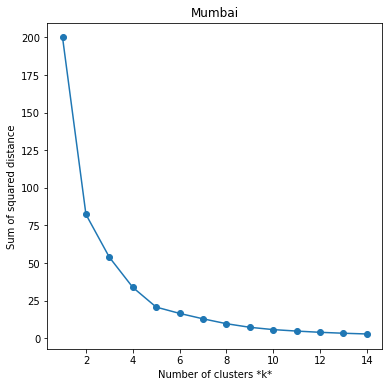

In [41]:
X_mum = df_final_mum[['lat', 'lng']]
X_mum_scaled = StandardScaler().fit_transform(X_mum)

sse = []
list_k = list(range(1, 15))

for k in list_k:
    km = KMeans(init = "k-means++", n_clusters=k)
    km.fit(X_mum_scaled)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.title('Mumbai')
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

Text(0, 0.5, 'Silhouette_score')

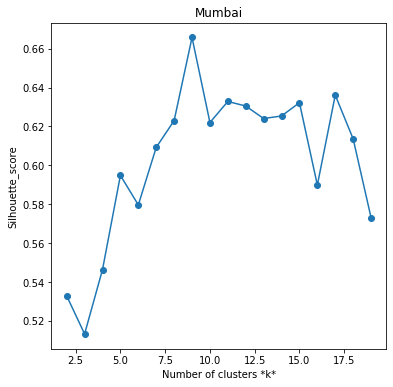

In [42]:
ss_score = []

list_k = list(range(2, 20))

for k in list_k:
    km = KMeans(init = "k-means++", n_clusters=k)
    preds = km.fit_predict(X_mum_scaled)
    centers = km.cluster_centers_
    score = silhouette_score(X_mum_scaled, preds)
    ss_score.append(score)
    
plt.figure(figsize=(6, 6))
plt.title('Mumbai')
plt.plot(list_k, ss_score, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Silhouette_score')

Text(0, 0.5, 'Sum of squared distance')

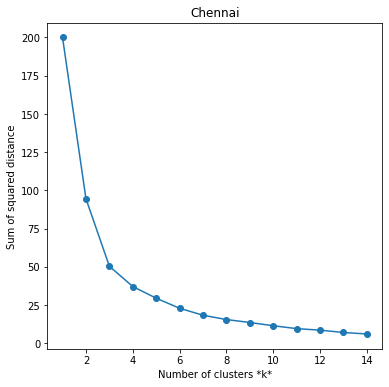

In [43]:
X_che = df_final_che[['lat', 'lng']]
X_che_scaled = StandardScaler().fit_transform(X_che)

sse = []
list_k = list(range(1, 15))

for k in list_k:
    km = KMeans(init = "k-means++", n_clusters=k)
    km.fit(X_che_scaled)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.title('Chennai')
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

Text(0, 0.5, 'Silhouette_score')

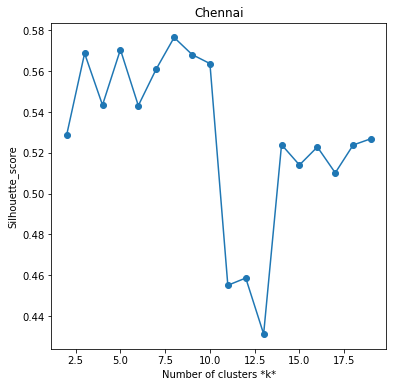

In [44]:
ss_score = []

list_k = list(range(2, 20))

for k in list_k:
    km = KMeans(init = "k-means++", n_clusters=k)
    preds = km.fit_predict(X_che_scaled)
    centers = km.cluster_centers_
    score = silhouette_score(X_che_scaled, preds)
    ss_score.append(score)
    
plt.figure(figsize=(6, 6))
plt.title('Chennai')
plt.plot(list_k, ss_score, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Silhouette_score')

Text(0, 0.5, 'Sum of squared distance')

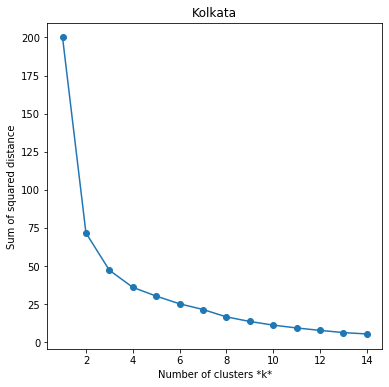

In [45]:
X_kol = df_final_kol[['lat', 'lng']]
X_kol_scaled = StandardScaler().fit_transform(X_kol)

sse = []
list_k = list(range(1, 15))

for k in list_k:
    km = KMeans(init = "k-means++", n_clusters=k)
    km.fit(X_kol_scaled)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.title('Kolkata')
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

Text(0, 0.5, 'Silhouette_score')

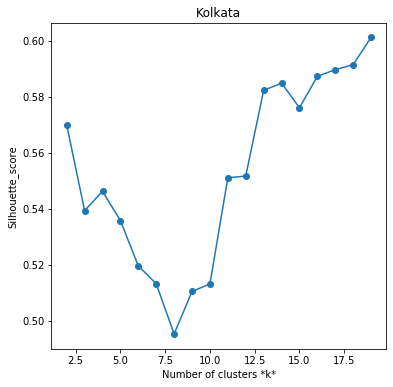

In [46]:
ss_score = []

list_k = list(range(2, 20))

for k in list_k:
    km = KMeans(init = "k-means++", n_clusters=k)
    preds = km.fit_predict(X_kol_scaled)
    centers = km.cluster_centers_
    score = silhouette_score(X_kol_scaled, preds)
    ss_score.append(score)
    
plt.figure(figsize=(6, 6))
plt.title('Kolkata')
plt.plot(list_k, ss_score, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Silhouette_score')

Text(0, 0.5, 'Sum of squared distance')

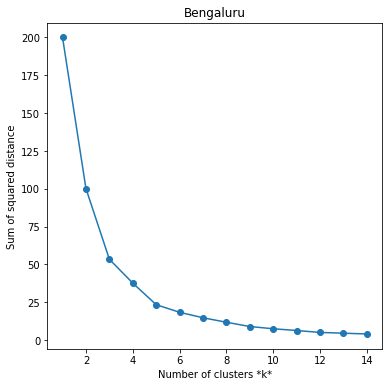

In [48]:
X_ben = df_final_ben[['lat', 'lng']]
X_ben_scaled = StandardScaler().fit_transform(X_ben)

sse = []
list_k = list(range(1, 15))

for k in list_k:
    km = KMeans(init = "k-means++", n_clusters=k)
    km.fit(X_ben_scaled)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.title('Bengaluru')
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

Text(0, 0.5, 'Silhouette_score')

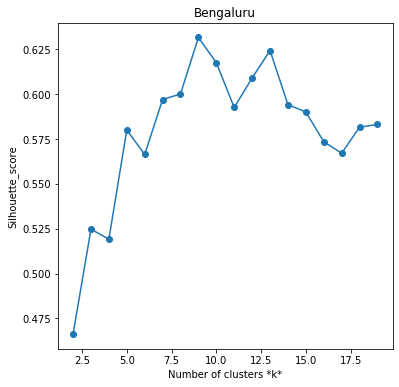

In [49]:
ss_score = []

list_k = list(range(2, 20))

for k in list_k:
    km = KMeans(init = "k-means++", n_clusters=k)
    preds = km.fit_predict(X_ben_scaled)
    centers = km.cluster_centers_
    score = silhouette_score(X_ben_scaled, preds)
    ss_score.append(score)
    
plt.figure(figsize=(6, 6))
plt.title('Bengaluru')
plt.plot(list_k, ss_score, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Silhouette_score')

The difference shows that; the global optimum widely varies from local optimum. Thus it would be prudent to proceed with global optimums.

### Creating Models using best K

### Delhi

In [50]:
k = 14
kmeans = KMeans(init = "k-means++", n_clusters=k, random_state=0).fit(X_del_scaled)
labels = {'cluster': kmeans.labels_}

In [51]:
# add cluster labels to the dataframes
df_clus_del = pd.concat([df_final_del[['Indian Restaurant','lat', 'lng', 'distance']], pd.DataFrame(labels)], axis =1 )

In [52]:
# grouping by cluster for mean values
df_del_group = df_clus_del.groupby('cluster').mean()
df_del_group

,Indian Restaurant,lat,lng,distance
cluster,,,,
0,0.166667,28.593077,77.241747,6263.000000
1,0.000000,28.645444,77.186265,3008.750000
2,0.285714,28.603529,77.187181,5425.571429
3,0.192308,28.633173,77.219225,1338.692308
4,0.000000,28.688282,77.202908,5041.000000
5,0.142857,28.599980,77.225135,5074.142857
6,0.166667,28.596164,77.172281,6940.166667
7,0.400000,28.656162,77.227963,1781.800000
8,0.000000,28.613874,77.280064,7082.000000


In [53]:
# Counts of venue in the each cluster
df_del_count = df_clus_del['cluster'].value_counts(ascending = False)
df_del_count

3     26
5     14
1      8
2      7
12     6
6      6
4      6
0      6
11     5
7      5
10     4
9      4
13     2
8      1
Name: cluster, dtype: int64

In [54]:
# Creating final dataframe for recommender modelling 

df_eval_del = pd.concat([df_del_group, df_del_count ], axis = 1, join = 'inner')
df_eval_del.rename(columns = {'cluster': 'count'}, inplace = True)
df_recommend_del = df_eval_del[df_eval_del['Indian Restaurant'] == 0].sort_values(by = 'distance')

### Let us repeat same process of evaluation as above for all Cities one by one

### Mumbai

In [55]:
k = 9
kmeans = KMeans(init = "k-means++", n_clusters=k, random_state=0).fit(X_mum_scaled)
labels = {'cluster': kmeans.labels_}

In [56]:
df_clus_mum = pd.concat([df_final_mum[['Indian Restaurant','lat', 'lng', 'distance']], pd.DataFrame(labels)], axis =1 )

In [57]:
df_mum_group = df_clus_mum.groupby('cluster').mean()

In [58]:
df_mum_count = df_clus_mum['cluster'].value_counts(ascending = False)

In [59]:
df_eval_mum = pd.concat([df_mum_group, pd.DataFrame(df_mum_count)], axis = 1, join = 'inner')
df_eval_mum.rename(columns = {'cluster': 'count'}, inplace = True)
df_recommend_mum = df_eval_mum[df_eval_mum['Indian Restaurant'] == 0].sort_values(by = 'distance')

### Chennai

In [60]:
k = 8
kmeans = KMeans(init = "k-means++", n_clusters=k, random_state=0).fit(X_che_scaled)
labels = {'cluster': kmeans.labels_}

In [61]:
df_clus_che = pd.concat([df_final_che[['Indian Restaurant','lat', 'lng', 'distance']], pd.DataFrame(labels)], axis =1 )

In [62]:
df_che_group = df_clus_che.groupby('cluster').mean()

In [63]:
df_che_count = df_clus_che['cluster'].value_counts(ascending = False)

In [64]:
df_eval_che = pd.concat([df_che_group, pd.DataFrame(df_che_count)], axis = 1, join = 'inner')
df_eval_che.rename(columns = {'cluster': 'count'}, inplace = True)
df_recommend_che = df_eval_che[df_eval_che['Indian Restaurant'] == 0].sort_values(by = 'distance')

### Kolkata

In [65]:
k = 19
kmeans = KMeans(init = "k-means++", n_clusters=k, random_state=0).fit(X_kol_scaled)
labels = {'cluster': kmeans.labels_}

In [66]:
df_clus_kol = pd.concat([df_final_kol[['Indian Restaurant','lat', 'lng', 'distance']], pd.DataFrame(labels)], axis =1 )

In [67]:
df_kol_group = df_clus_kol.groupby('cluster').mean()

In [68]:
df_kol_count = df_clus_kol['cluster'].value_counts(ascending = False)

In [69]:
df_eval_kol = pd.concat([df_kol_group, pd.DataFrame(df_kol_count)], axis = 1, join = 'inner')
df_eval_kol.rename(columns = {'cluster': 'count'}, inplace = True)
df_recommend_kol = df_eval_kol[df_eval_kol['Indian Restaurant'] == 0].sort_values(by = 'distance')
df_recommend_kol

,Indian Restaurant,lat,lng,distance,count
4,0.0,22.564753,88.348300,1857.000000,3
14,0.0,22.578971,88.395667,3355.500000,4
18,0.0,22.561254,88.328391,3880.500000,2
3,0.0,22.537695,88.350328,4166.555556,9
5,0.0,22.545434,88.391777,4181.400000,5
17,0.0,22.595092,88.414559,5781.000000,4
13,0.0,22.615717,88.412193,6901.000000,2
6,0.0,22.514969,88.393282,7098.200000,5
2,0.0,22.505159,88.360822,7526.000000,8
7,0.0,22.558181,88.289223,7842.000000,1


### Bengaluru

In [70]:
k = 8
kmeans = KMeans(init = "k-means++", n_clusters=k, random_state=0).fit(X_ben_scaled)
labels = {'cluster': kmeans.labels_}

In [71]:
df_clus_ben = pd.concat([df_final_ben[['Indian Restaurant','lat', 'lng', 'distance']], pd.DataFrame(labels)], axis =1 )

In [72]:
df_ben_group = df_clus_ben.groupby('cluster').mean()

In [73]:
df_ben_count = df_clus_ben['cluster'].value_counts(ascending = False)

In [74]:
df_eval_ben = pd.concat([df_ben_group, pd.DataFrame(df_ben_count)], axis = 1, join = 'inner')
df_eval_ben.rename(columns = {'cluster': 'count'}, inplace = True)
df_recommend_ben = df_eval_ben[df_eval_ben['Indian Restaurant'] == 0].sort_values(by = 'distance')

## Visualising results

I used folium library to plot the clusters on the map. I used following markers for indicating clusters,
* Folium.Circle for plotting circles with radius equal to binned distances from the centre of city.
* Folium.Marker to plot Indian restaurants.
* Folium.CircleMarker to plot venues within a cluster.


In [75]:
from matplotlib.pyplot import cm

In [76]:
color = ['red', 'blue', 'green', 'brown', 'DarkTurquoise', 'magenta', 'cyan', 'BlueVoilet', 'DeepPink', 'LawnGreen', 'OrangeRed', 'Olive', 'LightSeaGreen', 'LightSteelBlue', 'Indigo', 'RosyBrown', 'SeaGreen', 'SeaShell', 'Beige']

In [77]:
del_map = folium.Map([latitude[0], longitude[0]], zoom_start = 11)

for lat, lng, cluster, label in zip(df_clus_del['lat'], df_clus_del['lng'], df_clus_del['cluster'], df_clus_del['Indian Restaurant']):
    #print(lat, lng, cluster)
    folium.CircleMarker( [lat, lng], color = color[cluster], fill = True,fill_opacity = 0.6, radius = 5, parse_html = True).add_to(del_map)
    if label == 1:
        folium.Marker([lat, lng], popup = 'Indian Restaurant', icon = folium.Icon(icon ='info-sign')).add_to(del_map)

for bin in bins:
    folium.Circle([latitude[0], longitude[0]], color = 'black', radius = bin).add_to(del_map)
    
folium.LatLngPopup().add_to(del_map)        
del_map.save('delhi_cluster.html')
del_map

In [78]:
mum_map = folium.Map([latitude[1], longitude[1]], zoom_start = 11)

for lat, lng, cluster, label in zip(df_clus_mum['lat'], df_clus_mum['lng'], df_clus_mum['cluster'], df_clus_mum['Indian Restaurant']):
    #print(lat, lng, cluster)
    folium.CircleMarker( [lat, lng], color = color[cluster], fill = True,fill_opacity = 0.6, radius = 5, parse_html = True).add_to(mum_map)
    if label == 1:
        folium.Marker([lat, lng], popup = 'Indian Restaurant', icon = folium.Icon(icon ='info-sign')).add_to(mum_map)

for bin in bins:
    folium.Circle([latitude[1], longitude[1]], color = 'black', radius = bin).add_to(mum_map)
    
folium.LatLngPopup().add_to(mum_map)        
mum_map.save('mum_cluster.html')
mum_map

In [79]:
che_map = folium.Map([latitude[2], longitude[2]], zoom_start = 11)

for lat, lng, cluster, label in zip(df_clus_che['lat'], df_clus_che['lng'], df_clus_che['cluster'], df_clus_che['Indian Restaurant']):
    #print(lat, lng, cluster)
    folium.CircleMarker( [lat, lng], color = color[cluster], fill = True,fill_opacity = 0.6, radius = 5, parse_html = True).add_to(che_map)
    if label == 1:
        folium.Marker([lat, lng], popup = 'Indian Restaurant', icon = folium.Icon(icon ='info-sign')).add_to(che_map)

for bin in bins:
    folium.Circle([latitude[2], longitude[2]], color = 'black', radius = bin).add_to(che_map)
    
folium.LatLngPopup().add_to(che_map)

che_map.save('che_cluster.html')
che_map

In [80]:
kol_map = folium.Map([latitude[3], longitude[3]], zoom_start = 11)

for lat, lng, cluster, label in zip(df_clus_kol['lat'], df_clus_kol['lng'], df_clus_kol['cluster'], df_clus_kol['Indian Restaurant']):
    #print(lat, lng, cluster)
    folium.CircleMarker( [lat, lng], color = color[cluster], fill = True,fill_opacity = 0.6, radius = 5, parse_html = True).add_to(kol_map)
    if label == 1:
        folium.Marker([lat, lng], popup = 'Indian Restaurant', icon = folium.Icon(icon ='info-sign')).add_to(kol_map)

for bin in bins:
    folium.Circle([latitude[3], longitude[3]], color = 'black', radius = bin).add_to(kol_map)
    
folium.LatLngPopup().add_to(kol_map)        
kol_map.save('kol_cluster.html')
kol_map

In [81]:
ben_map = folium.Map([latitude[4], longitude[4]], zoom_start = 11)

for lat, lng, cluster, label in zip(df_clus_ben['lat'], df_clus_ben['lng'], df_clus_ben['cluster'], df_clus_ben['Indian Restaurant']):
    #print(lat, lng, cluster)
    folium.CircleMarker( [lat, lng], color = color[cluster], fill = True,fill_opacity = 0.6, radius = 5, parse_html = True).add_to(ben_map)
    if label == 1:
        folium.Marker([lat, lng], popup = 'Indian Restaurant', icon = folium.Icon(icon ='info-sign')).add_to(ben_map)

for bin in bins:
    folium.Circle([latitude[4], longitude[4]], color = 'black', radius = bin).add_to(ben_map)
    
folium.LatLngPopup().add_to(ben_map)

ben_map.save('ben_cluster.html')

ben_map

## Recommender System for Selecting best cluster

We will set up following criteria for our recommender system. 
1. The cluster must not have any Indian Restaurant: As we decided the best restaurant cuisine should be Indian as per our Exploratory Data Analysis. And to reduce competition within the local cluster, it would be prudent to avoid any cluster which already has an Indian restaurant. 
2. The cluster should be ‘nearest possible’ to the city centre: Again, the EDA showed that nearest may not be the best thus this parameter should be viewed in conjunction with point 3 mentioned below.
3. The cluster should have ‘highest possible density’: This might sound counter intuitive at first to place our business in the middle of densest cluster. But this could work in our favour as higher density indicates higher footfall, visits and popularity meaning higher visibility for our restaurant. Thus, as explained in above point, our recommender system should choose the optimal distanced cluster based on nearest possible distance and highest possible density.

First thing first, I eliminated all cluster which already had Indian restaurants in them.
Next, I realised that finding recommender score should be a function of distance and density. But while my one parameter was to be selected for lowest value and other parameter for highest value. So, I needed to scale one of the parameter to ensure the direction of change of slope for each parameter is in one direction.
Thus, I inversed my direction data and multiplied it with cluster data. Providing me with a score which would be highest if the both distance and cluster density (count of venues) are optimised for their minimum and maximum value respectively. 


In [82]:
## lets first create a new column by inversing the distances

def inverse_distance(df):
    max_distance = 1/df['distance']
    return max_distance

df_recommend_del['inverse_dist'] = df_recommend_del.apply(inverse_distance, axis = 1)
df_recommend_mum['inverse_dist'] = df_recommend_mum.apply(inverse_distance, axis = 1)
df_recommend_che['inverse_dist'] = df_recommend_che.apply(inverse_distance, axis = 1) 
df_recommend_kol['inverse_dist'] = df_recommend_kol.apply(inverse_distance, axis = 1)
df_recommend_ben['inverse_dist'] = df_recommend_ben.apply(inverse_distance, axis = 1)
df_recommend_ben

,Indian Restaurant,lat,lng,distance,count,inverse_dist
2,0.0,12.972181,77.601005,2251.384615,26,0.000444
4,0.0,12.998710,77.615905,4826.500000,4,0.000207
0,0.0,12.974894,77.634196,5836.727273,11,0.000171


In [83]:
# By inversing distance we now have brought the relationship between distance and cluster in positive quadrant,
#i.e. the multiplication of inverse distance and cluster will result in a score which will be higher when the
#distance decreases and cluster increases. 

#Lets now write a function to find recommendation score in a particular city

def recommend_score(df):
    score = df['inverse_dist']*df['count']
    return score

df_recommend_del['score'] = df_recommend_del.apply(recommend_score, axis = 1)
df_recommend_mum['score'] = df_recommend_mum.apply(recommend_score, axis = 1)
df_recommend_che['score'] = df_recommend_che.apply(recommend_score, axis = 1) 
df_recommend_kol['score'] = df_recommend_kol.apply(recommend_score, axis = 1)
df_recommend_ben['score'] = df_recommend_ben.apply(recommend_score, axis = 1)
df_recommend_ben

,Indian Restaurant,lat,lng,distance,count,inverse_dist,score
2,0.0,12.972181,77.601005,2251.384615,26,0.000444,0.011548
4,0.0,12.998710,77.615905,4826.500000,4,0.000207,0.000829
0,0.0,12.974894,77.634196,5836.727273,11,0.000171,0.001885


In [84]:
# Lets us find the highest scoring cluster from each city
from IPython.display import display
print('Delhi')
display(df_recommend_del[df_recommend_del.score == df_recommend_del.score.max()])
print('Mumbai')
display(df_recommend_mum[df_recommend_mum.score == df_recommend_mum.score.max()])
print('Chennai')
display(df_recommend_che[df_recommend_che.score == df_recommend_che.score.max()])
print('Kolkata')
display(df_recommend_kol[df_recommend_kol.score == df_recommend_kol.score.max()])
print('Bengaluru')
display(df_recommend_ben[df_recommend_ben.score == df_recommend_ben.score.max()])

Delhi


,Indian Restaurant,lat,lng,distance,count,inverse_dist,score
1,0.0,28.645444,77.186265,3008.75,8,0.000332,0.002659


Mumbai


,Indian Restaurant,lat,lng,distance,count,inverse_dist,score
7,0.0,19.067727,72.86588,1639.6,5,0.00061,0.00305


Chennai


,Indian Restaurant,lat,lng,distance,count,inverse_dist,score
5,0.0,13.043017,80.201891,4742.2,5,0.000211,0.001054


Kolkata


,Indian Restaurant,lat,lng,distance,count,inverse_dist,score
3,0.0,22.537695,88.350328,4166.555556,9,0.00024,0.00216


Bengaluru


,Indian Restaurant,lat,lng,distance,count,inverse_dist,score
2,0.0,12.972181,77.601005,2251.384615,26,0.000444,0.011548


#### The final result suggested by our models here unequivocally suggest that cluster 2 of Bengaluru is the most suitable cluster for the new restaurant. 

## Predicting Traffic for our selected Cluster 

The Bing Maps Isochrone API provides time-specific, isoline polygons for the distance that is reachable from a given location and supports multiple modes of transportation (i.e., driving, walking, and public transit). Use this solution to plan the area that can be reached from a designated starting point within a set time period.

* Store Locators – Show me all locations that are within 10 minutes of a user.
* Stolen Vehicle Recovery – Where could a vehicle have travelled to since it was stolen.
* Real Estate – Limit search results such that only those that are within the users preferred commute preferences to work. For example, show me all homes that are within a 30-minute drive of work.

More details about this API is available [here](https://docs.microsoft.com/en-us/bingmaps/rest-services/routes/calculate-an-isochrone)


In [7]:
#unique bingkey for calling API
bingkey = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'

In [100]:
df_clus_ben = pd.concat([df_final_ben[['category','lat', 'lng', 'distance']], pd.DataFrame(labels)], axis =1 )
df_final_clus = df_clus_ben[df_clus_ben['cluster'] == 2]

In [101]:
mean_lat_lng = list(df_eval_ben.iloc[2,1:3])
mean_lat_lng

[12.972180651530596, 77.60100541421615]

I chose the mean of latitude and longitude of best cluster as base location for calling this API. In real life scenario, businesses can choose the potential store locations to get results.
Few of the parameters that I selected for making this API call include,
* maxTime: The maximum travel time in the specified time units in which the isochrone polygon is generated. I have set it as 30 Minutes.
* dateTime: When a maxTime value is specified, predictive traffic data is used to calculate the best isochrone route for the specified date time. I have provided two values,
    * 25th Jan 2020 18:00 hrs as it was a holiday weekend and presumably peak traffic time. (marked in yellow)
    * 22nd Jan 2020 18:00 hrs as it was mid-week (marked in red)
* Optimize: Specifies what parameters to use to optimize the isochrone route. One of the following values.
    * time [default]: The route is calculated to minimize the time. Traffic information is not used. Use with maxTime.
    * timeWithTraffic: The route is calculated to minimize the time and uses current or predictive traffic information depending on if a dateTime value is specified. Use with maxTime.
    * I have chosen this as timeWithTraffic
Also, 
* I have plotted folium.Circle for binned distance now choosing mean lat and long as base location.
* folim.Marker to denote mean lat and long location
* folium.CircleMarker to denote all cluster venues.
* And folium.PolyLine for plotting the isochrone diagram.


In [8]:
# Setting up call parameters
waypoint = '12.972180651530596, 77.60100541421615'
maxTime = '30'
timeUnit = 'minute'
optimize = 'timeWithTraffic'
dateTime = ['2020-01-25T18:00:00', '2020-01-22T18:00:00']

In [9]:
# getting urls
urls = []
for datetime in dateTime:
    url = 'https://dev.virtualearth.net/REST/v1/Routes/Isochrones?waypoint={}&maxtime={}&timeUnit={}&dateTime={}&optimize={}&key={}'.format(waypoint, maxTime, timeUnit, datetime, optimize, bingkey)
    urls.append(url)
urls

['https://dev.virtualearth.net/REST/v1/Routes/Isochrones?waypoint=12.972180651530596, 77.60100541421615&maxtime=30&timeUnit=minute&dateTime=2020-01-25T18:00:00&optimize=timeWithTraffic&key=XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX',
 'https://dev.virtualearth.net/REST/v1/Routes/Isochrones?waypoint=12.972180651530596, 77.60100541421615&maxtime=30&timeUnit=minute&dateTime=2020-01-22T18:00:00&optimize=timeWithTraffic&key=XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX']

In [104]:
# calling api to get results
results = []
for url in urls:
    result = requests.get(url)
    print(result)
    result_json = result.json()
    results.append(result_json)

<Response [200]>
<Response [200]>


In [105]:
# Cleaning data
poly_coor_0 = results[0]['resourceSets'][0]['resources'][0]['polygons'][0]['coordinates'] #Weekend info
poly_coor_1 = results[1]['resourceSets'][0]['resources'][0]['polygons'][0]['coordinates'] #Mid-week info

In [106]:
# creating dataframe for plot
df_poly_0 = pd.DataFrame(poly_coor_0).transpose()
df_poly_1 = pd.DataFrame(poly_coor_1).transpose()

In [107]:
# renaming columns
df_poly_0.columns = ['lat and long']
df_poly_1.columns = ['lat and long']

In [108]:
df_poly_0.shape

(1200, 1)

In [109]:
df_poly_1.shape

(1251, 1)

In [110]:
# creating parent folium map with radius circles and base location
polymap = folium.Map([mean_lat_lng[0], mean_lat_lng[1]], zoom_start =11)

folium.Marker([mean_lat_lng[0], mean_lat_lng[1]], popup = 'Base Location', icon = folium.Icon(icon ='info-sign')).add_to(polymap)

for bin in bins:
    folium.Circle([mean_lat_lng[0], mean_lat_lng[1]], color = 'black', popup = str(bin) + 'mtr', weight = 3, radius = bin).add_to(polymap)
    
folium.LatLngPopup().add_to(polymap)  

polymap

In [111]:
# Adding isochrone to the map
folium.PolyLine(df_poly_0['lat and long'], color = 'yellow', smoothFactor = 10).add_to(polymap)
folium.PolyLine(df_poly_1['lat and long'], color = 'red', smoothFactor = 10).add_to(polymap)

polymap

In [112]:
# Creating venue plots for the selected cluster
for lat, long in zip(df_final_clus['lat'], df_final_clus['lng']):
    folium.CircleMarker([lat, long], color = 'blue', fill = True, radius = 5).add_to(polymap)
    
polymap.save('final_result.html')
polymap

We can see that, the traffic density on a weekend is actually slightly less than that on week days, as isochrone area for weekend is slightly larger.

The map indicates that the restaurant at mean location will be able to cater the needs to people in the radius of 4KM and in certain cases up to 6 KM.

## Conclusions

In my project, I have tried to predict the best location to open a new restaurant along with the recommendation on which cuisine they should offer. I found through exploratory data analysis that, regardless of the city, Indian cuisine is still the most popular among people.

Another revelation was that, nearness to the city centre or square doesn’t really translates into the best location for business. 

I used KMeans clustering algorithm on spatial data and silhouette coefficient to determine most distinct clusters with least intra-cluster distance and most inter-cluster distance.
Finally, I presented a recommender system to recommend best location based on count of venues in a particular cluster, distance of cluster from city centre and absence of Indian restaurants in the cluster.

Finally, the cluster 2 of Bengaluru city was suggested as best cluster to place our business based on our modelling and recommendation. I hope this model and analysis will help new business in identifying the best location within a city for their new businesses.


## Future directions

The analysis produced here based on the recommendations suggested by the Foursquare API, spatial distance between venues and type of business that are already present. However, the actual location of the restaurant may vary based on the availability of the space, rent rates, proximity to roads or highways etc. 

Another interesting study could be analysis of the crime data in the locality and use it as one of the modelling parameters.


### Thanks for completing this notebook !!!

Author - Minhaj Ahmed Ansari 